<a href="https://colab.research.google.com/github/RonitGandhi/Robo-Baseball-Umpries/blob/main/Robotic_Umprires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybaseball

In [3]:
from pybaseball import statcast
import pandas as pd

# Define the date range for the last five years
start_date = '2020-01-01'
end_date = '2024-12-31'

# Fetch Statcast data for all players
data = statcast(start_dt=start_date, end_dt=end_date)

# Display the first few rows of the data
print(data.head())

# Save data to a CSV file for later use
data.to_csv('statcast_data_2018_2022.csv', index=False)


This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|██████████| 1081/1081 [18:16<00:00,  1.01s/it]


     pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
1770         FF 2024-06-08           98.9           -2.3           5.92   
1814         FF 2024-06-08           98.9          -2.53           5.73   
1850         FF 2024-06-08           97.6          -2.41           5.75   
1896         FF 2024-06-08           96.5           -2.4           5.78   
1957         FF 2024-06-08           97.2          -2.36           5.82   

          player_name  batter  pitcher     events      description  ...  \
1770  Kopech, Michael  680776   656629  strikeout  swinging_strike  ...   
1814  Kopech, Michael  680776   656629        NaN             foul  ...   
1850  Kopech, Michael  680776   656629        NaN             foul  ...   
1896  Kopech, Michael  680776   656629        NaN             ball  ...   
1957  Kopech, Michael  680776   656629        NaN    called_strike  ...   

      post_home_score  post_bat_score  post_fld_score  if_fielding_alignment  \
1770              

In [4]:
data = pd.read_csv('/content/statcast_data_2018_2022.csv')

In [5]:
# Select relevant columns for batters
batter_columns = [
    'game_date', 'player_name', 'batter', 'pitcher', 'pitch_type',
    'release_speed', 'plate_x', 'plate_z', 'events', 'description',
    'stand', 'home_team', 'away_team', 'inning', 'inning_topbot',
    'hit_distance_sc', 'launch_speed', 'launch_angle', 'bb_type'
]

batter_data_filtered = data[batter_columns]

# Display the first few rows of the filtered data
print(batter_data_filtered.head())

print (data.columns)
pitcher_columns = [
    'game_date', 'player_name', 'batter', 'pitcher', 'pitch_type',
    'release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
    'plate_x', 'plate_z', 'release_extension', 'zone',
    'events', 'description', 'home_team', 'away_team', 'inning', 'inning_topbot'
]

# Filter the data to include only the selected columns
pitcher_data_filtered = data[pitcher_columns]

# Display the first few rows of the filtered data
print(pitcher_data_filtered.head())


    game_date      player_name  batter  pitcher pitch_type  release_speed  \
0  2024-06-08  Kopech, Michael  680776   656629         FF           98.9   
1  2024-06-08  Kopech, Michael  680776   656629         FF           98.9   
2  2024-06-08  Kopech, Michael  680776   656629         FF           97.6   
3  2024-06-08  Kopech, Michael  680776   656629         FF           96.5   
4  2024-06-08  Kopech, Michael  680776   656629         FF           97.2   

   plate_x  plate_z     events      description stand home_team away_team  \
0    -0.81     3.35  strikeout  swinging_strike     L       CWS       BOS   
1     1.12     2.95        NaN             foul     L       CWS       BOS   
2     0.28     2.73        NaN             foul     L       CWS       BOS   
3    -0.79     4.24        NaN             ball     L       CWS       BOS   
4    -0.45     3.21        NaN    called_strike     L       CWS       BOS   

   inning inning_topbot  hit_distance_sc  launch_speed  launch_angle bb_ty

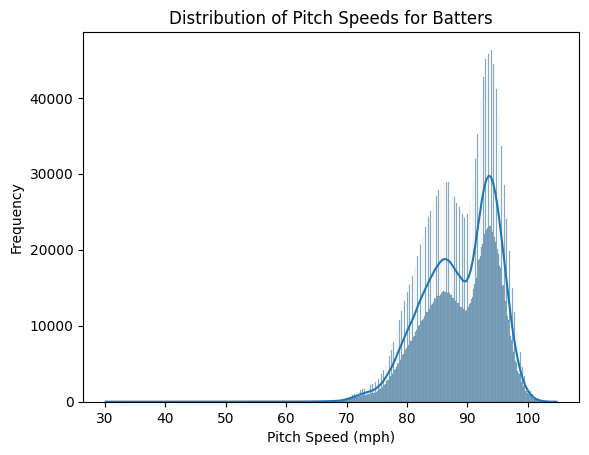

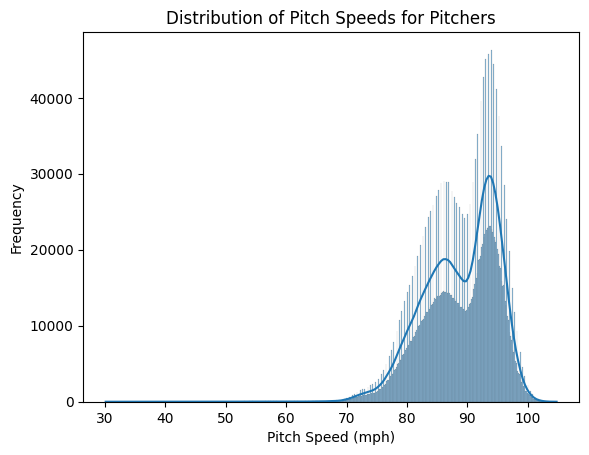

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of pitch speeds for batters
sns.histplot(batter_data_filtered['release_speed'], kde=True)
plt.title('Distribution of Pitch Speeds for Batters')
plt.xlabel('Pitch Speed (mph)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of pitch speeds for pitchers
sns.histplot(pitcher_data_filtered['release_speed'], kde=True)
plt.title('Distribution of Pitch Speeds for Pitchers')
plt.xlabel('Pitch Speed (mph)')
plt.ylabel('Frequency')
plt.show()
